Make the required imports before we start using the packages.

In [1]:
from nba_api.stats.endpoints import playergamelog, commonallplayers
import matplotlib.pyplot as plt
import time

Let's generate a list of all players for the requested season.

In [2]:
season = '2023-24'
allPlayers = commonallplayers.CommonAllPlayers(season=season, is_only_current_season=0, timeout=60).get_dict()
activePlayers = []

for player in allPlayers['resultSets'][0]['rowSet']:
	if player[3] == 1:
		activePlayers.append(player)

Let's get each players total accumulated points over the whole season.

In [3]:
myPlayers = {}

for player in activePlayers:
	time.sleep(3.5)

	gameLog = playergamelog.PlayerGameLog(player_id=player[0], season=season, timeout=120).get_dict()
	fpoints = []

	if len(gameLog['resultSets'][0]['rowSet']) == 0:
		myPlayers[player[2]] = sum(fpoints)
		continue

	for game in gameLog['resultSets'][0]['rowSet']:
		fieldGoalsMade = 2 * game[7]
		fieldGoalsAttempted = -1 * game[8]
		threePointersMade = game[10]
		freeThrowsMade = game[13]
		freeThrowsAttempted = -1 * game[14]
		rebounds = game[18]
		assists = 2 * game[19]
		steals = 4 * game[20]
		blocks = 4 * game[21]
		turnovers = -2 * game[22]
		points = game[24]
		fpoints.append(
			fieldGoalsMade + fieldGoalsAttempted +
			freeThrowsMade + freeThrowsAttempted +
			threePointersMade +
			rebounds + assists +
			steals + blocks +
			turnovers + points
		)
	
	myPlayers[player[2]] = sum(fpoints)
	print(player[2], '->', sum(fpoints))

Precious Achiuwa -> 1520
Bam Adebayo -> 2887
Ochai Agbaji -> 1039
Santi Aldama -> 1531
Nickeil Alexander-Walker -> 1554
Grayson Allen -> 2214
Jarrett Allen -> 2934
Jose Alvarado -> 975
Kyle Anderson -> 1667
Giannis Antetokounmpo -> 4250
Thanasis Antetokounmpo -> 95
Cole Anthony -> 1828
OG Anunoby -> 1476
Deni Avdija -> 2304
Deandre Ayton -> 1995
Udoka Azubuike -> 92
Ibou Badji -> 173
Marvin Bagley III -> 1148
Amari Bailey -> 42
Patrick Baldwin Jr. -> 428
LaMelo Ball -> 1000
Mo Bamba -> 828
Paolo Banchero -> 3036
Desmond Bane -> 1738
Dalano Banton -> 984
Dominick Barlow -> 404
Harrison Barnes -> 1667
Scottie Barnes -> 2731
RJ Barrett -> 1830
Charles Bassey -> 268
Emoni Bates -> 59
Keita Bates-Diop -> 530
Nicolas Batum -> 1131
Darius Bazley -> 132
Bradley Beal -> 1875
Malik Beasley -> 1691
MarJon Beauchamp -> 415
Jules Bernard -> 133
Davis Bertans -> 560
Patrick Beverley -> 1262
Saddiq Bey -> 1561
Goga Bitadze -> 1098
Onuralp Bitim -> 129
Bismack Biyombo -> 586
Anthony Black -> 738
Leaky

Now, let's plot those points on a bar chart and see which players are in the top 20.

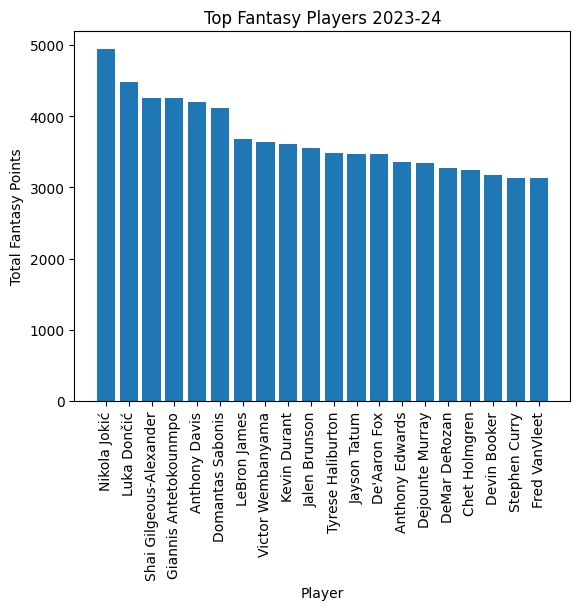

In [8]:
sortedPoints = dict(sorted(myPlayers.items(), key=lambda x: x[1], reverse=True))
plt.bar(list(sortedPoints.keys())[:20], list(sortedPoints.values())[:20])
plt.title("Top Fantasy Players 2023-24")
plt.ylabel("Total Fantasy Points")
plt.xlabel("Player")
plt.xticks(rotation=90)
plt.show()